[]

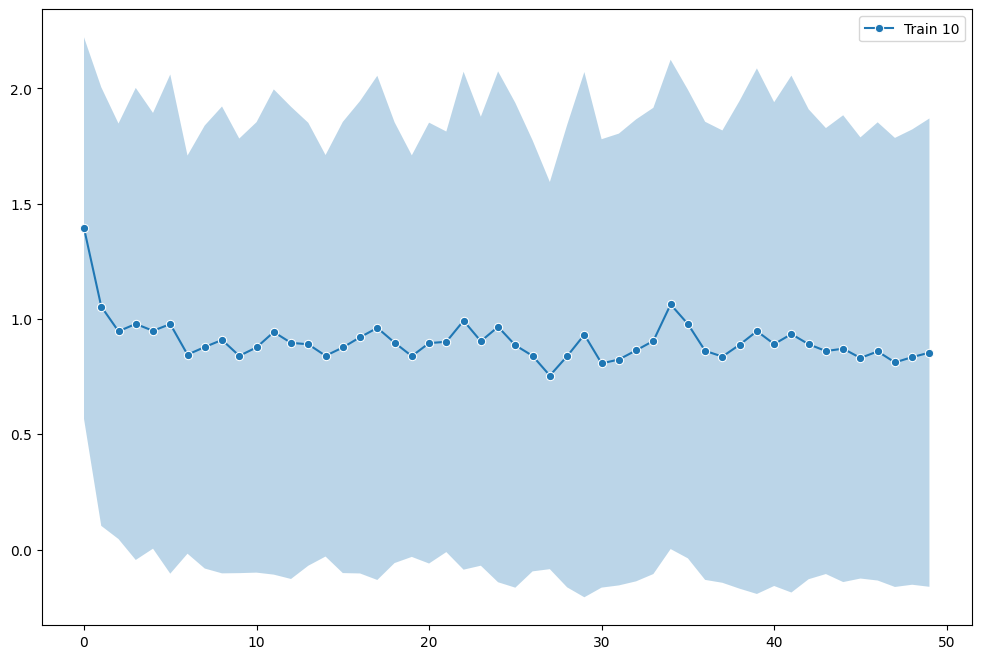

In [8]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define the main folder
main_folder = 'runs'

# Initialize data storage
plot_data = {}

# Traverse subfolders
subfolders = [ '10']
for subfolder in subfolders:
    subfolder_path = os.path.join(main_folder, subfolder)
    train_data_all = []
    val_data_all = []
    for x in range (3):  # Iterate over X = 0, 1, 2
        train_file = os.path.join(subfolder_path, f'loss_train{x}.npy')
        val_file = os.path.join(subfolder_path, f'loss_val{x}.npy')

        # Load .npy files
        train_data = np.load(train_file)
        val_data = np.load(val_file)
        
        # Collect data
        train_data_all.append(train_data)
        val_data_all.append(val_data)

    # Stack and calculate element-wise statistics
    train_data_all = np.vstack(train_data_all)  # Shape: (num_files, vector_length)
    val_data_all = np.vstack(val_data_all)

    train_means = np.mean(train_data_all, axis=0)  # Element-wise mean
    train_stds = np.std(train_data_all, axis=0)   # Element-wise std
    val_means = np.mean(val_data_all, axis=0)    # Element-wise mean
    val_stds = np.std(val_data_all, axis=0)      # Element-wise std

    # Store data for plotting
    plot_data[subfolder] = {
        'train_means': train_means,
        'train_stds': train_stds,
        'val_means': val_means,
        'val_stds': val_stds
    }
x_ticks = range(len(train_means))  # X values corresponding to vector indices


for s in subfolders:
    fig, ax = plt.subplots(figsize=(12, 8))

    data = plot_data[subfolder]
    sns.lineplot(x=x_ticks, y=data['train_means'], label=f'Train {subfolder}', marker="o")

    ax.fill_between(x_ticks, 
                    np.array(data['train_means']) - np.array(data['train_stds']), 
                    np.array(data['train_means']) + np.array(data['train_stds']), 
                    alpha=0.3)



plt.plot()

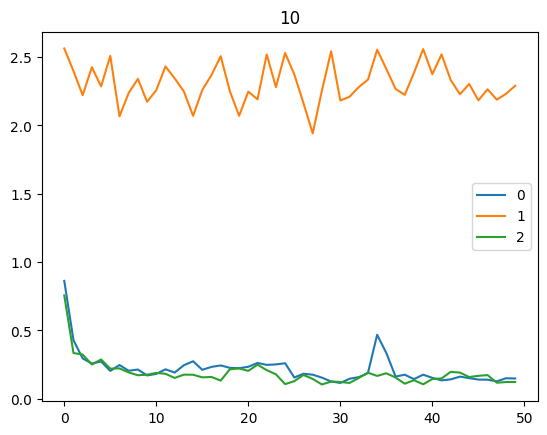

In [11]:
subfolders = [ '10',]
for subfolder in subfolders:
    subfolder_path = os.path.join(main_folder, subfolder)
    train_data_all = []
    val_data_all = []

    for x in range(3):  # Iterate over X = 0, 1, 2
        train_file = os.path.join(subfolder_path, f'loss_train{x}.npy')
        val_file = os.path.join(subfolder_path, f'loss_val{x}.npy')

        # Load .npy files
        train_data = np.load(train_file)
        val_data = np.load(val_file)
        
        # Collect data
        train_data_all.append(train_data)
        val_data_all.append(val_data)

    for i,t in enumerate(train_data_all):
        plt.plot(t,label=f'{i}')
    plt.title(subfolder)
    plt.legend()
    plt.show()